## 一、导包 ##

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## 二、数据导入和预处理 ##

In [2]:
# 导入csv文件
file_path = './dataset/DataSet.csv' 
data = pd.read_csv(file_path)

data.shape

(17880, 18)

In [3]:
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f


In [4]:
#数据映射，f映射为0，t映射为1
data['telecommuting']=data['telecommuting'].map({'f':0,'t':1})
data['has_company_logo']=data['has_company_logo'].map({'f':0,'t':1})
data['has_questions']=data['has_questions'].map({'f':0,'t':1})
data['fraudulent']=data['fraudulent'].map({'f':0,'t':1})
print(data.dtypes)

#interpolate函数对数据集进行插值操作，它根据已知数据的趋势和模式来推测缺失值。
data.interpolate(inplace=True)
data.isnull().sum()

title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
in_balanced_dataset    object
dtype: object


C:\Users\10690\AppData\Local\Temp\ipykernel_1000\811987579.py:9: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  data.interpolate(inplace=True)


title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                0
requirements            2689
benefits                7196
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
in_balanced_dataset        0
dtype: int64

In [5]:
#删除一些特征
columns=['in_balanced_dataset', 'telecommuting', 'has_company_logo', 'has_questions', 'salary_range', 'employment_type']
for col in columns:
    del data[col]

#空格填充空值
data.fillna(' ', inplace=True)

data.head()

,title,location,department,company_profile,description,requirements,benefits,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,Not Applicable,,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,,,,,,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


c:\Users\10690\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\10690\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\10690\anaconda3\envs\py39\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,count
fraudulent,
0,17014
1,866


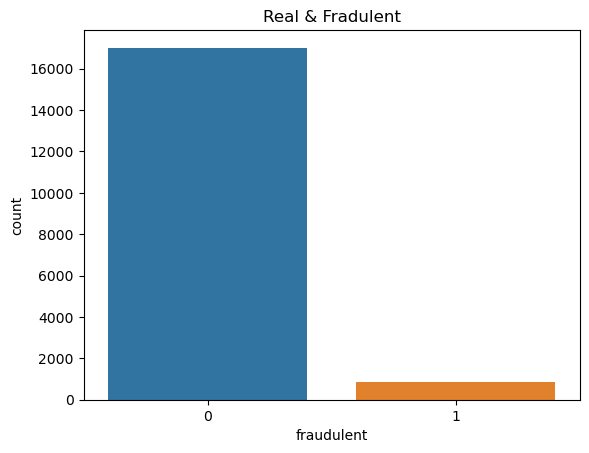

In [6]:
#画计数图
import seaborn as sns
sns.countplot(data=data,x='fraudulent').set_title('Real & Fradulent')
pd.DataFrame(data["fraudulent"].value_counts())

Text(0.5, 0, 'Countries')

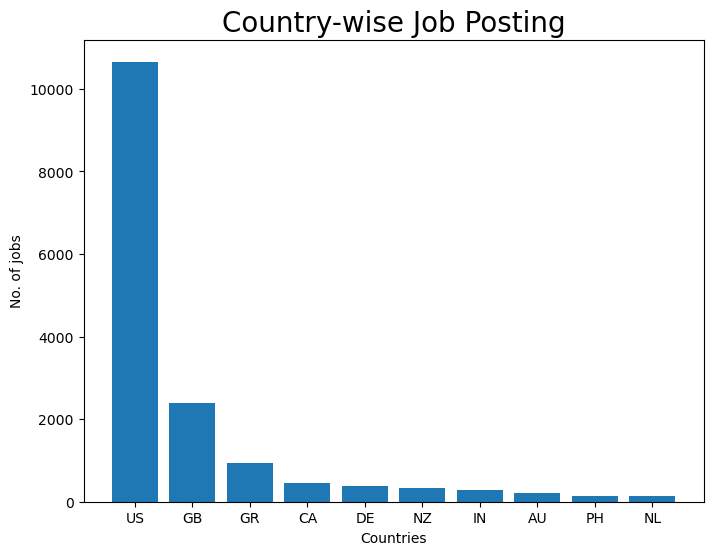

In [7]:
#工作地点分布可视化
import matplotlib.pyplot as plt

#将工作地点字段第第一个逗号前split出来，作为工作地点参数，
# 便于后续可视化和数据处理
def split(location):
    l = location.split(',')
    return l[0]
#使用了字典来统计每个国家的岗位数量，并只保留前11个最频繁出现的国家。
#删除了country字典中的空格键。
data['country'] = data.location.apply(split)
country = dict(data.country.value_counts()[:11])
del country[' ']
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

In [8]:
# 工作title数量前十
print(data.title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


In [9]:
#前十工作title真实岗位数
print(data[data.fraudulent==0].title.value_counts()[:10])

title
English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: count, dtype: int64


In [10]:
#合并文本数据类型特征，开始数据清洗
data['text']=(data['title']+' '+data['location']+' '+data['department']
              +' '+data['company_profile']+' '+data['description']+' '+data['requirements']
              +' '+data['benefits']+' '+data['required_experience']+' '+data['required_education']
              +' '+data['industry']+' '+data['function']+' '+data['country'])
del data['title']
del data['location']
del data['department']
del data['company_profile']
del data['description']
del data['requirements']
del data['benefits']
del data['required_experience']
del data['required_education']
del data['industry']
del data['function']
del data['country']

In [11]:
data.head()

,fraudulent,text
0,0,"Marketing Intern US, NY, New York Marketing <h..."
1,0,"Customer Service - Cloud Video Production NZ, ..."
2,0,"Commissioning Machinery Assistant (CMA) US, IA..."
3,0,"Account Executive - Washington DC US, DC, Wash..."
4,0,"Bill Review Manager US, FL, Fort Worth <p>Sp..."


In [12]:
#处理html标签
#处理前
data['text'][0]

"Marketing Intern US, NY, New York Marketing <h3>We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.</h3>\r\n<p>We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.</p>\r\n<p>Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.</p>\r\n<p>We're located in Chelsea, in New York City.</p> <p>Food52, a fast-growing, 

In [13]:
from bs4 import BeautifulSoup
# 逐行处理HTML文本
for i in range(len(data)):
    html_text = data.loc[i, 'text']
    
    # 使用BeautifulSoup解析HTML文本
    soup = BeautifulSoup(html_text, "html.parser")

    # 获取纯文本内容
    plain_text = soup.get_text(strip=True)
    
    # 将处理后的文本保存回数据集
    data.loc[i, 'text'] = plain_text

In [14]:
#处理后
data['text'][0]

"Marketing Intern US, NY, New York MarketingWe're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.Food52, a fast-growing, James Beard Award-winning online food community

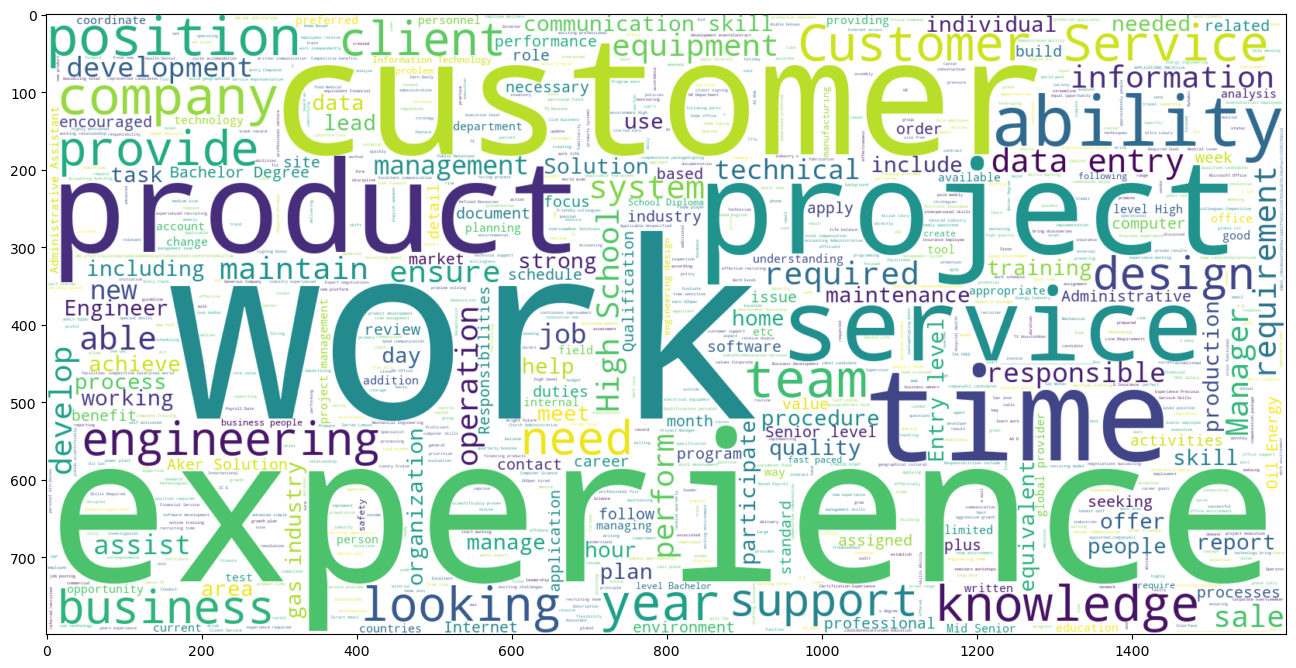

In [15]:
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

#分离真实工作和虚假工作
fraudjobs_text = data[data.fraudulent==1].text
actualjobs_text = data[data.fraudulent==0].text

#Fraudulent jobs word cloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS,background_color='white').generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear', cmap='viridis')

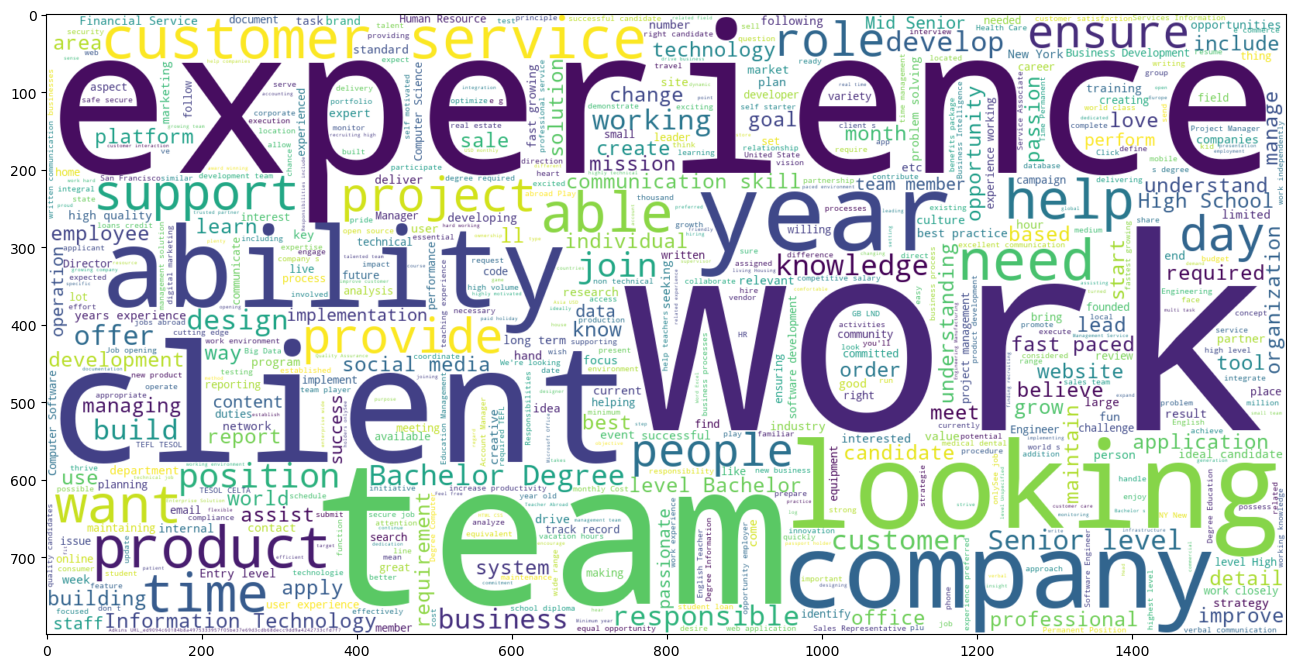

In [16]:
#真实工作词云

plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS,background_color='white').generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear', cmap='viridis')

## 三、文本数据的模型训练与预测

In [17]:
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, mean_squared_error, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split


#分离训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.2)

Accuracy={}
Mean_Squared_Error={}
Roc_auc_score={}

In [18]:
#随机森林
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, precision_score, recall_score, mean_squared_error, f1_score


Random_Forest_pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', RandomForestClassifier())])

model_Random_Forest = Random_Forest_pipe.fit(X_train, y_train)
Random_Forest_pred = model_Random_Forest.predict(X_test)

Accuracy["Random_Forest"]=accuracy_score(y_test, Random_Forest_pred)*100
Mean_Squared_Error["Random_Forest"]=mean_squared_error(y_test, Random_Forest_pred)
Roc_auc_score["Random_Forest"]=roc_auc_score(y_test, Random_Forest_pred)

print("Accuracy of Random Forest Classifier: {}%".format(round(accuracy_score(y_test, Random_Forest_pred)*100,2)))
print("\nMean Squared Error of Random Forest Classifier: {}%".format(mean_squared_error(y_test, Random_Forest_pred)))
print ("Roc_auc_score of Random Forest Classifier: {}%".format(roc_auc_score(y_test, Random_Forest_pred)))

print("\nConfusion Matrix of Random Forest Classifier:\n")
print(confusion_matrix(y_test, Random_Forest_pred))
print("\nCLassification Report of Random Forest Classifier:\n")
print(classification_report(y_test, Random_Forest_pred))

Accuracy of Random Forest Classifier: 98.55%

Mean Squared Error of Random Forest Classifier: 0.0145413870246085%
Roc_auc_score of Random Forest Classifier: 0.8404907975460123%

Confusion Matrix of Random Forest Classifier:

[[3413    0]
 [  52  111]]

CLassification Report of Random Forest Classifier:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3413
           1       1.00      0.68      0.81       163

    accuracy                           0.99      3576
   macro avg       0.99      0.84      0.90      3576
weighted avg       0.99      0.99      0.98      3576



In [19]:
#神经网络
from sklearn.neural_network import MLPClassifier
vectorizer = CountVectorizer()
sentence_vectors = vectorizer.fit_transform(data["text"])
# Splitting dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(sentence_vectors, data.fraudulent, test_size=0.3)
mlp = MLPClassifier(solver = 'adam', activation = 'relu', hidden_layer_sizes = (100, 50, 30), max_iter = 1000)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

Accuracy["MLPAdam"]=accuracy_score(y_test, mlp_pred)*100
Mean_Squared_Error["MLPAdam"]=mean_squared_error(y_test, mlp_pred)
Roc_auc_score["MLPAdam"]=roc_auc_score(y_test, mlp_pred)

print("Accuracy of MLPAdam Classifier: {}%".format(round(accuracy_score(y_test, mlp_pred)*100,2)))
print("\nMean Squared Error:", mean_squared_error(y_test, mlp_pred))
print ("Roc_auc_score of MLPAdam Classifier: {}%".format(roc_auc_score(y_test, mlp_pred)))

print("\nConfusion Matrix of MLPAdam Classifier:\n")
print(confusion_matrix(y_test, mlp_pred))
print("\nCLassification Report of MLPAdam Classifier:\n")
print(classification_report(y_test, mlp_pred))

Accuracy of MLPAdam Classifier: 97.39%

Mean Squared Error: 0.02609992542878449
Roc_auc_score of MLPAdam Classifier: 0.7475318346867562%

Confusion Matrix of MLPAdam Classifier:

[[5092    6]
 [ 134  132]]

CLassification Report of MLPAdam Classifier:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5098
           1       0.96      0.50      0.65       266

    accuracy                           0.97      5364
   macro avg       0.97      0.75      0.82      5364
weighted avg       0.97      0.97      0.97      5364



c:\Users\10690\anaconda3\envs\py39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
#决策树
X_train, X_test, y_train, y_test = train_test_split(data.text, data.fraudulent, test_size=0.3)
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
Decision_tree_pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', tree.DecisionTreeClassifier())])

model_decision_tree = Decision_tree_pipe.fit(X_train, y_train)
decision_tree_pred = model_decision_tree.predict(X_test)


Accuracy["Decision_tree"]=accuracy_score(y_test, decision_tree_pred)*100
Mean_Squared_Error["Decision_tree"]=mean_squared_error(y_test, decision_tree_pred)
Roc_auc_score["Decision_tree"]=roc_auc_score(y_test, decision_tree_pred)

print("Accuracy of Decision Tree Classifier: {}%".format(round(accuracy_score(y_test, decision_tree_pred)*100,2)))
print("\nMean Squared Error of Decision Tree Classifier: {}%".format(mean_squared_error(y_test, decision_tree_pred)))
print ("Roc_auc_score of Decision Tree Classifier: {}%".format(roc_auc_score(y_test, decision_tree_pred)))

print("\nConfusion Matrix of Decision Tree Classifier:\n")
print(confusion_matrix(y_test, decision_tree_pred))
print("\nClassification Report of Decision Tree Classifier:\n")
print(classification_report(y_test, decision_tree_pred))

Accuracy of Decision Tree Classifier: 97.76%

Mean Squared Error of Decision Tree Classifier: 0.02237136465324385%
Roc_auc_score of Decision Tree Classifier: 0.8605255811111894%

Confusion Matrix of Decision Tree Classifier:

[[5059   52]
 [  68  185]]

Classification Report of Decision Tree Classifier:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5111
           1       0.78      0.73      0.76       253

    accuracy                           0.98      5364
   macro avg       0.88      0.86      0.87      5364
weighted avg       0.98      0.98      0.98      5364



In [ ]:
#逻辑回归
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer,TfidfTransformer
logistic_pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LogisticRegression())])

model_logistic = logistic_pipe.fit(X_train, y_train)
logistic_pred = model_logistic.predict(X_test)

Accuracy["Logistic"]=accuracy_score(y_test, logistic_pred)*100
Mean_Squared_Error["Logistic"]=mean_squared_error(y_test, logistic_pred)
Roc_auc_score["Logistic"]=roc_auc_score(y_test, logistic_pred)

print("Accuracy of Logistic Classifier: {}%".format(round(accuracy_score(y_test, logistic_pred)*100,2)))
print("\nMean Squared Error of Logistic Classifier: {}%".format(mean_squared_error(y_test, logistic_pred)))
print ("Roc_auc_score of Logistic Classifier: {}%".format(roc_auc_score(y_test, logistic_pred)))

print("\nConfusion Matrix of Logistic Regression Classifier:\n")
print(confusion_matrix(y_test, logistic_pred))
print("\nCLassification Report of Logistic Regression Classifier:\n")
print(classification_report(y_test, logistic_pred))

Accuracy of Logistic Classifier: 97.18%

Mean Squared Error of Logistic Classifier: 0.02815063385533184%
Roc_auc_score of Logistic Classifier: 0.7015810276679841%

Confusion Matrix of Logistic Regression Classifier:

[[5111    0]
 [ 151  102]]

CLassification Report of Logistic Regression Classifier:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      5111
           1       1.00      0.40      0.57       253

    accuracy                           0.97      5364
   macro avg       0.99      0.70      0.78      5364
weighted avg       0.97      0.97      0.97      5364



In [ ]:
#KNN分类
from sklearn.neighbors import KNeighborsClassifier
K_Nearest_Neighbors_pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', KNeighborsClassifier(n_neighbors=3))])

model_K_Nearest_Neighbors = K_Nearest_Neighbors_pipe.fit(X_train, y_train)
K_Nearest_Neighbors_pred = model_K_Nearest_Neighbors.predict(X_test)

Accuracy["K_Nearest_Neighbors"]=accuracy_score(y_test, K_Nearest_Neighbors_pred)*100
Mean_Squared_Error["K_Nearest_Neighbors"]=mean_squared_error(y_test, K_Nearest_Neighbors_pred)
Roc_auc_score["K_Nearest_Neighbors"]=roc_auc_score(y_test, K_Nearest_Neighbors_pred)


print("Accuracy of K_Nearest_Neighbors Classifier: {}%".format(round(accuracy_score(y_test, K_Nearest_Neighbors_pred)*100,2)))
print("\nMean Squared Error of K Nearest Neighbors Classifier: {}%".format(mean_squared_error(y_test, K_Nearest_Neighbors_pred)))
print ("Roc_auc_score of K Nearest Neighbors Classifier: {}%".format(roc_auc_score(y_test, K_Nearest_Neighbors_pred)))

print("\nConfusion Matrix of K_Nearest_Neighbors Classifier:\n")
print(confusion_matrix(y_test, K_Nearest_Neighbors_pred))
print("\nCLassification Report of K_Nearest_Neighbors Classifier:\n")
print(classification_report(y_test, K_Nearest_Neighbors_pred))

Accuracy of K_Nearest_Neighbors Classifier: 98.49%

Mean Squared Error of K Nearest Neighbors Classifier: 0.015100671140939598%
Roc_auc_score of K Nearest Neighbors Classifier: 0.8726537341886287%

Confusion Matrix of K_Nearest_Neighbors Classifier:

[[3394   11]
 [  43  128]]

CLassification Report of K_Nearest_Neighbors Classifier:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3405
           1       0.92      0.75      0.83       171

    accuracy                           0.98      3576
   macro avg       0.95      0.87      0.91      3576
weighted avg       0.98      0.98      0.98      3576



In [ ]:
#支持向量机
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
Support_Vector_pipe = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('model', LinearSVC())])

model_svc = Support_Vector_pipe.fit(X_train, y_train)
svc_pred = model_svc.predict(X_test)

Accuracy["Support_Vector"]=accuracy_score(y_test, svc_pred)*100
Mean_Squared_Error["Support_Vector"]=mean_squared_error(y_test, svc_pred)
Roc_auc_score["Support_Vector"]=roc_auc_score(y_test, svc_pred)

print("Accuracy of SVM Classifier: {}%".format(round(accuracy_score(y_test, svc_pred)*100,2)))
print("\nMean Squared Error of SVM Classifier: {}%".format(mean_squared_error(y_test, svc_pred)))
print ("Roc_auc_score of SVM Classifier: {}%".format(roc_auc_score(y_test, svc_pred)))

print("\nConfusion Matrix of SVM Classifier:\n")
print(confusion_matrix(y_test, svc_pred))
print("\nClassification Report of SVM Classifier:\n")
print(classification_report(y_test, svc_pred))

c:\Users\10690\anaconda3\envs\py39\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Accuracy of SVM Classifier: 98.73%

Mean Squared Error of SVM Classifier: 0.01267710663683818%
Roc_auc_score of SVM Classifier: 0.8750049300779611%

Confusion Matrix of SVM Classifier:

[[5106    5]
 [  63  190]]

Classification Report of SVM Classifier:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5111
           1       0.97      0.75      0.85       253

    accuracy                           0.99      5364
   macro avg       0.98      0.88      0.92      5364
weighted avg       0.99      0.99      0.99      5364

